In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def train_and_evaluate_model(label, train_dense, test_dense, train_labels, test_labels):    
    # Keep only the selected label
    train_labels_selected = train_labels[[label]]
    test_labels_selected = test_labels[[label]]

    # Filter out rows with NaN values for the selected label
    train_data_filtered = train_dense[~train_labels_selected[label].isna()]
    train_labels_filtered = train_labels_selected[label].dropna()

    test_data_filtered = test_dense[~test_labels_selected[label].isna()]
    test_labels_filtered = test_labels_selected[label].dropna()

    # Train a Decision Tree model on the training data
    model = DecisionTreeClassifier(random_state=42)
    model.fit(train_data_filtered, train_labels_filtered)

    # Get feature importances
    importances = model.feature_importances_

    # Get the feature names
    feature_names = train_data_filtered.columns

    # Sort the feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Print the feature importance for all features
    # print(f"\nFeature Importance for all features in {label}:")
    # for i in range(len(importances)):
    #     print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

    # Print top 2 most important features
    print(f"\nTop 2 most important features for {label}:")
    for i in range(2):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

    # Evaluate the model on the test set
    y_pred_test = model.predict(test_data_filtered)
    accuracy_test = accuracy_score(test_labels_filtered, y_pred_test)

    print(f"\nTest Accuracy for {label}: {accuracy_test:.2f}")


def run_for_all_labels():
    # Load dense training and testing features
    train_dense = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_dense_train.csv')
    test_dense = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_dense_test.csv')

    # Load training and testing labels
    train_labels = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_labels_train.csv')
    test_labels = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_labels_test.csv')

    # Drop any non-numeric columns like 'Unnamed: 0' (compound identifiers)
    train_dense = train_dense.drop(columns=['Unnamed: 0'], errors='ignore')
    test_dense = test_dense.drop(columns=['Unnamed: 0'], errors='ignore')

    # List of all label columns (excluding 'Unnamed: 0')
    label_columns = train_labels.columns.drop('Unnamed: 0', errors='ignore')

    # Loop over each label and train/evaluate the model
    for label in label_columns:
        train_and_evaluate_model(label, train_dense, test_dense, train_labels, test_labels)

# Run the code for all labels
run_for_all_labels()


Top 2 most important features for NR.AhR:
slogPVSA7: 0.0913
slogPVSA9: 0.0505

Test Accuracy for NR.AhR: 0.84

Top 2 most important features for NR.AR:
Chiv9: 0.2282
bcutv10: 0.1256

Test Accuracy for NR.AR: 0.95

Top 2 most important features for NR.AR.LBD:
Chiv8: 0.2370
MRVSA5: 0.1034

Test Accuracy for NR.AR.LBD: 0.97

Top 2 most important features for NR.Aromatase:
MR: 0.0438
FPSA2: 0.0376

Test Accuracy for NR.Aromatase: 0.89

Top 2 most important features for NR.ER:
bcute10: 0.0617
TIAC: 0.0613

Test Accuracy for NR.ER: 0.85

Top 2 most important features for NR.ER.LBD:
GATSv1: 0.0766
GATSv8: 0.0574

Test Accuracy for NR.ER.LBD: 0.93

Top 2 most important features for NR.PPAR.gamma:
bcutm1: 0.0478
MRVSA9: 0.0283

Test Accuracy for NR.PPAR.gamma: 0.91

Top 2 most important features for SR.ARE:
bcutm2: 0.0559
LogP: 0.0253

Test Accuracy for SR.ARE: 0.77

Top 2 most important features for SR.ATAD5:
P1v: 0.0393
MoRSEP17: 0.0332

Test Accuracy for SR.ATAD5: 0.91

Top 2 most important

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# Load dense training and testing features
train_dense = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_dense_train.csv')
test_dense = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_dense_test.csv')

# Load training and testing labels
train_labels = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_labels_train.csv')
test_labels = pd.read_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_labels_test.csv')

# Function to print basic information for each label
def print_label_info(label, train_data, test_data):
    print(f"Label: {label}")
    
    # For training set
    nan_train = train_data[label].isna().sum()
    class_0_train = (train_data[label] == 0).sum()
    class_1_train = (train_data[label] == 1).sum()
    
    print(f"Training set - NaN: {nan_train}, Class 0: {class_0_train}, Class 1: {class_1_train}")
    
    # For test set
    nan_test = test_data[label].isna().sum()
    class_0_test = (test_data[label] == 0).sum()
    class_1_test = (test_data[label] == 1).sum()
    
    print(f"Test set - NaN: {nan_test}, Class 0: {class_0_test}, Class 1: {class_1_test}")
    print("-" * 50)

# Loop through each label column (except the first column which is the identifier)
labels = train_labels.columns[1:]  # Exclude the first column if it's not a label
for label in labels:
    print_label_info(label, train_labels, test_labels)

if train_labels.isna().any().any():
    print("There are NaN values in the training set.")
else:
    print("There are no NaN values in the training set.")

# Optionally, you can also count how many NaN values exist
nan_count = train_labels.isna().sum().sum()
print(f"Total number of NaN values in the training set: {nan_count}")

In [15]:
import pandas as pd
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

def find_feature_pairs_with_accuracy(
    train_dense_path, test_dense_path, 
    train_labels_path, test_labels_path, 
    accuracy_threshold=0.8, label=None, exclude_features=None):
    
    # Load dense training and testing features
    train_dense = pd.read_csv(train_dense_path)
    test_dense = pd.read_csv(test_dense_path)
    
    # Load training and testing labels
    train_labels = pd.read_csv(train_labels_path)
    test_labels = pd.read_csv(test_labels_path)
    
    # Drop any non-numeric columns like 'Unnamed: 0' (compound identifiers)
    train_dense = train_dense.drop(columns=['Unnamed: 0'], errors='ignore')
    test_dense = test_dense.drop(columns=['Unnamed: 0'], errors='ignore')
    
    # Exclude specified features
    if exclude_features:
        train_dense = train_dense.drop(columns=exclude_features, errors='ignore')
        test_dense = test_dense.drop(columns=exclude_features, errors='ignore')

    # Get the feature names after dropping unwanted columns
    feature_names = train_dense.columns
    
    # If a specific label is provided, filter the labels
    labels_to_check = [label] if label else train_labels.columns[1:]  # Exclude 'Unnamed: 0'

    for lbl in labels_to_check:
        print(f"\nChecking label: {lbl}")
        
        # Filter out rows with NaN values for the current label
        train_labels_filtered = train_labels[[lbl]].dropna()
        test_labels_filtered = test_labels[[lbl]].dropna()
        
        train_data_filtered = train_dense.loc[train_labels_filtered.index]
        test_data_filtered = test_dense.loc[test_labels_filtered.index]
        
        train_y = train_labels_filtered[lbl]
        test_y = test_labels_filtered[lbl]
        
        # Normalize the data
        scaler = StandardScaler()
        train_data_scaled = scaler.fit_transform(train_data_filtered)
        test_data_scaled = scaler.transform(test_data_filtered)
        
        # Iterate through all feature pairs
        feature_pairs = combinations(range(train_data_scaled.shape[1]), 2)
        
        for i, (f1, f2) in enumerate(feature_pairs):
            train_X = train_data_scaled[:, [f1, f2]]
            test_X = test_data_scaled[:, [f1, f2]]
            
            # Train logistic regression
            # model = LogisticRegression(random_state=42)
            model = DecisionTreeClassifier(random_state=42)
            model.fit(train_X, train_y)

            importances = model.feature_importances_
            print(f"Feature Importance: {importances}")
            
            
            # Evaluate the model
            y_pred_test = model.predict(test_X)
            accuracy_test = accuracy_score(test_y, y_pred_test)
            
            if accuracy_test >= accuracy_threshold:
                print(f"Feature pair {i}: ({feature_names[f1]}, {feature_names[f2]})")
                print(f"Test Accuracy: {accuracy_test:.2f}")

# Example usage
find_feature_pairs_with_accuracy(
    train_dense_path='/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_dense_train.csv', 
    test_dense_path='/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_dense_test.csv',
    train_labels_path='/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_labels_train.csv', 
    test_labels_path='/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/tox21/tox21_labels_test.csv',
    accuracy_threshold=0.8,  # Specify accuracy threshold
    label='NR.AhR',  # Specify label or leave as None for all labels
    exclude_features=['AW']  # Specify feature columns to exclude
)


Checking label: NR.AhR
Feature Importance: [0.6833706 0.3166294]
Feature pair 0: (AWeight, Arto)
Test Accuracy: 0.83
Feature Importance: [0.47225564 0.52774436]
Feature pair 1: (AWeight, BertzCT)
Test Accuracy: 0.83
Feature Importance: [0.48763638 0.51236362]
Feature pair 2: (AWeight, Chi0)
Test Accuracy: 0.80
Feature Importance: [0.39045235 0.60954765]
Feature pair 3: (AWeight, Chi1)
Test Accuracy: 0.82
Feature Importance: [0.49737694 0.50262306]
Feature pair 4: (AWeight, Chi10)
Test Accuracy: 0.83
Feature Importance: [0.41935218 0.58064782]
Feature pair 5: (AWeight, Chi2)
Test Accuracy: 0.80
Feature Importance: [0.46091782 0.53908218]
Feature Importance: [0.51774022 0.48225978]
Feature pair 7: (AWeight, Chi3c)
Test Accuracy: 0.82
Feature Importance: [0.9937261 0.0062739]
Feature pair 8: (AWeight, Chi3ch)
Test Accuracy: 0.86
Feature Importance: [0.41684791 0.58315209]
Feature pair 9: (AWeight, Chi4)
Test Accuracy: 0.81
Feature Importance: [0.91216908 0.08783092]
Feature pair 10: (AWe

KeyboardInterrupt: 

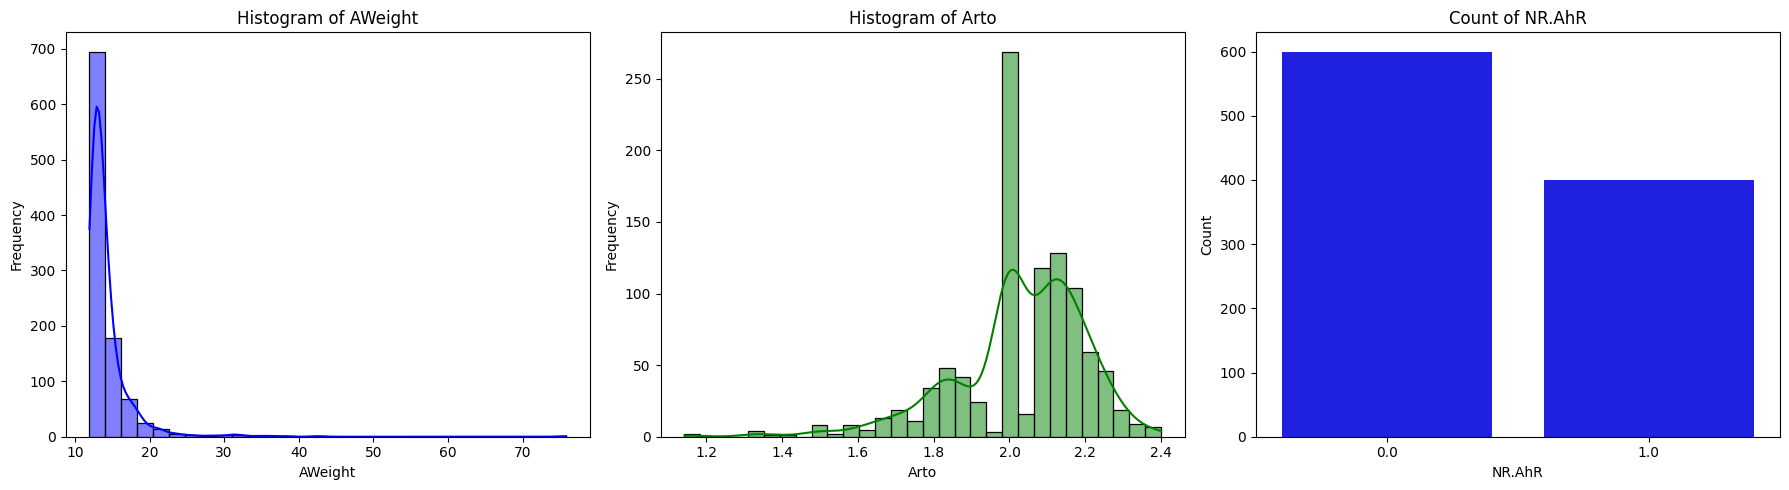

Feature Importance for AWeight and Arto: [0.31213132 0.68786868]
Test Accuracy for NR.AhR with features AWeight and Arto: 0.65


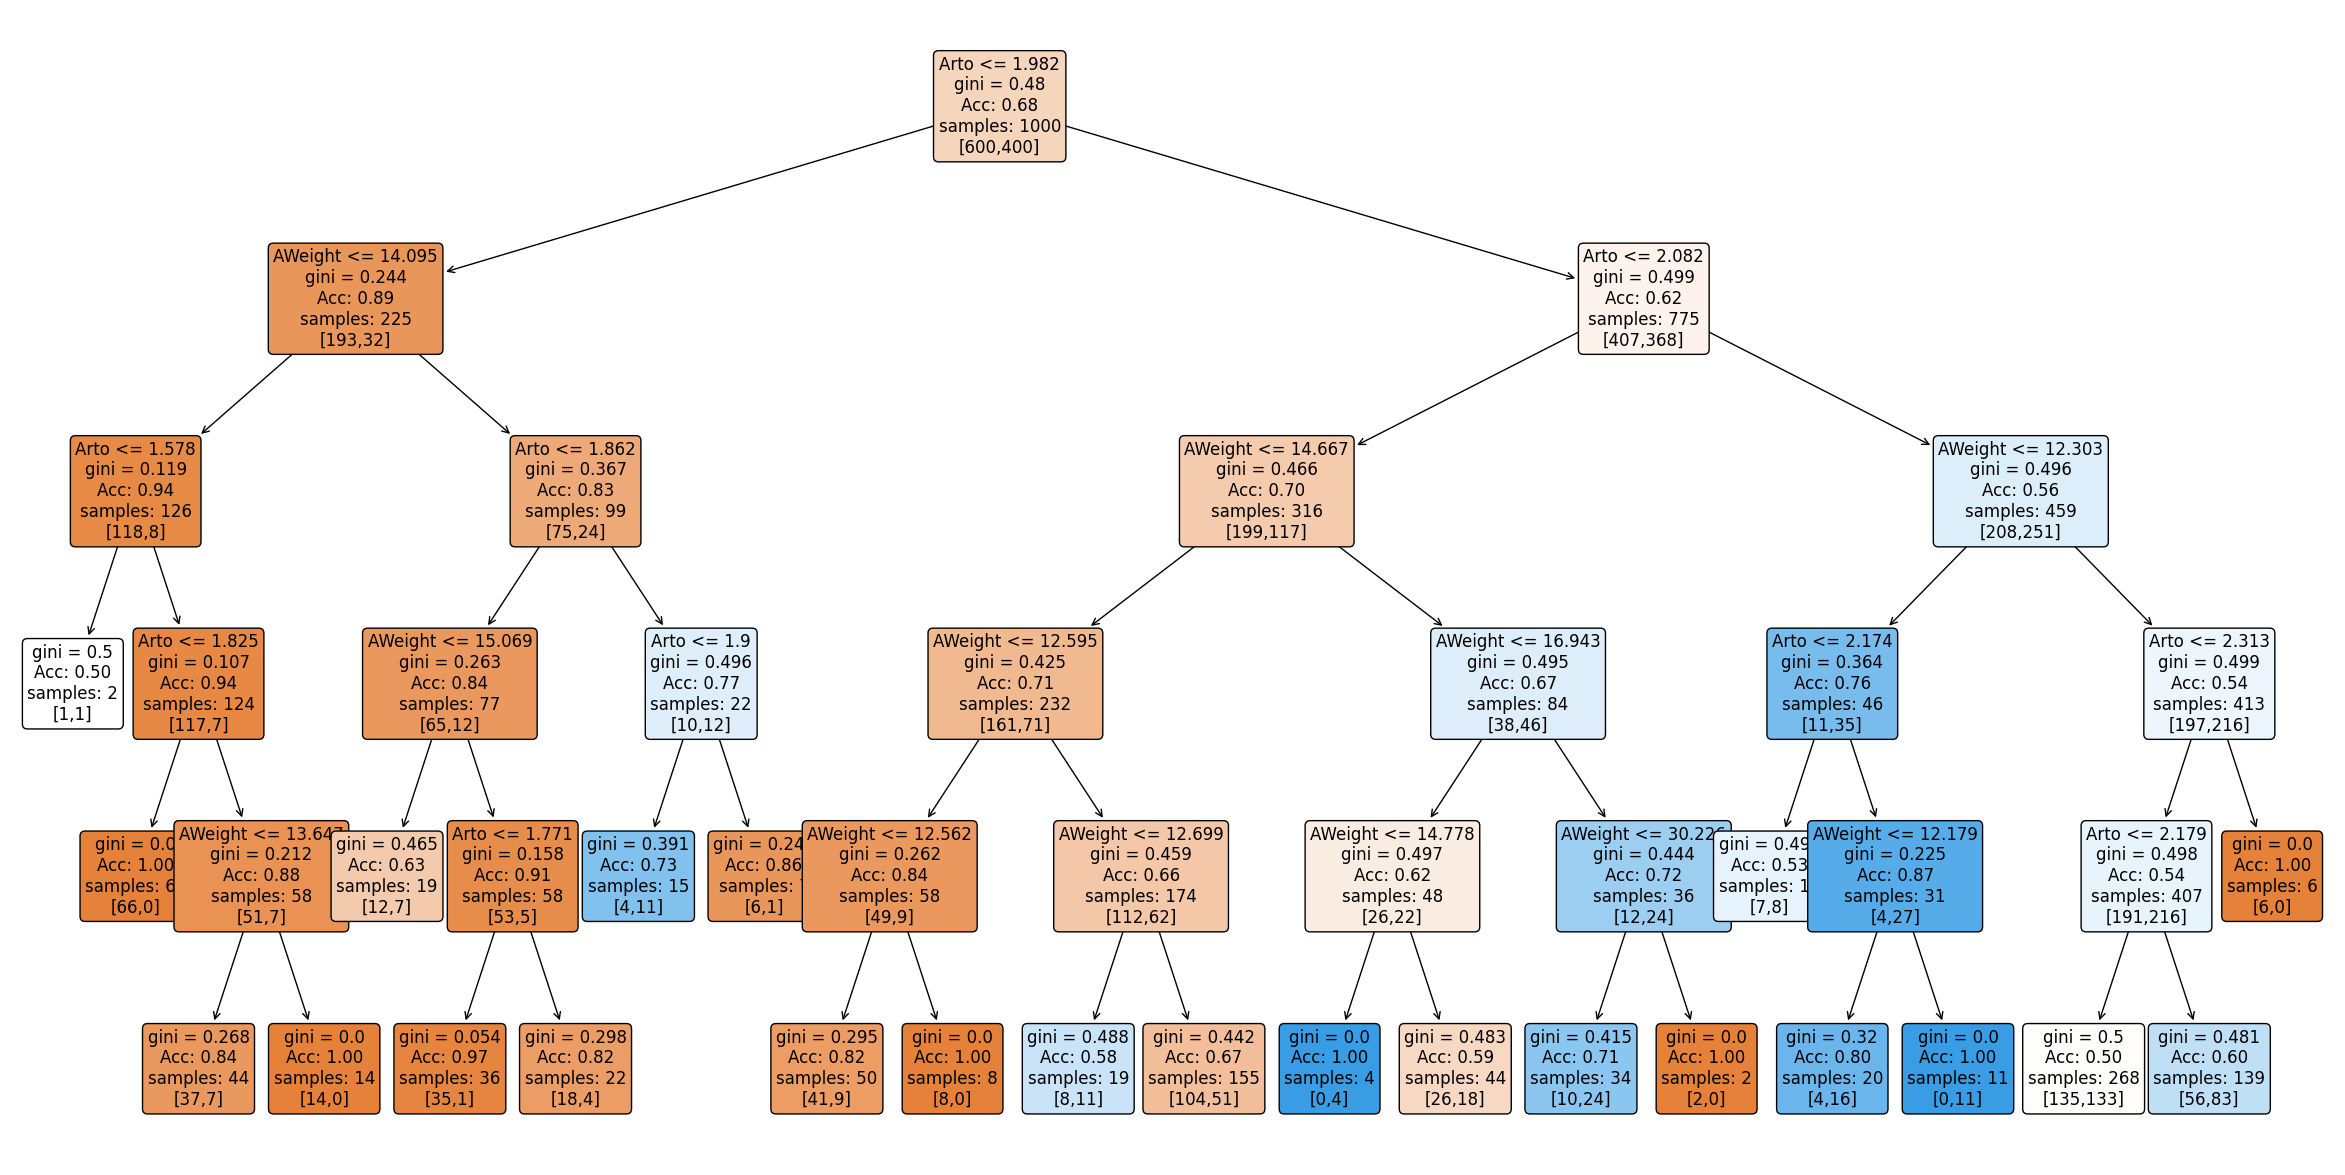

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Function to load the dataset and extract the specified features and label
def extract_features_and_label(dense_path, labels_path, feature1, feature2, label):
    dense_data = pd.read_csv(dense_path)
    labels_data = pd.read_csv(labels_path)
    dense_data = dense_data.drop(columns=['Unnamed: 0'], errors='ignore')
    features_and_label = dense_data[[feature1, feature2]].copy()
    features_and_label[label] = labels_data[label]
    features_and_label = features_and_label.dropna()
    return features_and_label

# Function to apply under-sampling with specified sample size for training data
def apply_under_sampling(features_and_label, label, sample_size, majority_ratio):
    X = features_and_label.drop(columns=[label])
    y = features_and_label[label]
    class_counts = y.value_counts()
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()
    n_minority_samples = int(sample_size * (1 - majority_ratio))
    n_majority_samples = int(sample_size * majority_ratio)
    n_minority_samples = min(n_minority_samples, class_counts[minority_class])
    n_majority_samples = min(n_majority_samples, class_counts[majority_class])
    under_sampler = RandomUnderSampler(sampling_strategy={majority_class: n_majority_samples, 
                                                          minority_class: n_minority_samples}, random_state=42)
    X_res, y_res = under_sampler.fit_resample(X, y)
    under_sampled_data = X_res.copy()
    under_sampled_data[label] = y_res
    return under_sampled_data

# Function to mix up the test data with fixed sampling
def mix_up_test_data(features_and_label, label):
    X = features_and_label.drop(columns=[label])
    y = features_and_label[label]
    class_counts = y.value_counts()
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()
    n_minority_samples = 40
    n_majority_samples = 100
    minority_sample = features_and_label[features_and_label[label] == minority_class].sample(n=n_minority_samples, random_state=42)
    majority_sample = features_and_label[features_and_label[label] == majority_class].sample(n=n_majority_samples, random_state=42)
    mixed_test_data = pd.concat([minority_sample, majority_sample], ignore_index=True)
    mixed_test_data = mixed_test_data.sample(frac=1, random_state=42).reset_index(drop=True)
    return mixed_test_data

# Function to plot histograms for two features and a count plot for the label
def plot_histograms(features_and_label, feature1, feature2, label):
    plt.figure(figsize=(18, 5))
    
    # Plot histogram for feature1
    plt.subplot(1, 3, 1)
    sns.histplot(features_and_label[feature1], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram of {feature1}')
    plt.xlabel(f'{feature1}')
    plt.ylabel('Frequency')

    # Plot histogram for feature2
    plt.subplot(1, 3, 2)
    sns.histplot(features_and_label[feature2], bins=30, kde=True, color='green', edgecolor='black')
    plt.title(f'Histogram of {feature2}')
    plt.xlabel(f'{feature2}')
    plt.ylabel('Frequency')

    # Plot count plot for label
    plt.subplot(1, 3, 3)
    sns.countplot(x=features_and_label[label], color='b')  # Removed palette and hue
    plt.title(f'Count of {label}')
    plt.xlabel(f'{label}')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

def evaluate_model(train_data, test_data, feature1, feature2, label):
    X_train = train_data[[feature1, feature2]]
    y_train = train_data[label]

    # Train a decision tree model
    model = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)    
    model.fit(X_train, y_train)

    importances = model.feature_importances_
    print(f"Feature Importance for {feature1} and {feature2}: {importances}")   

    X_test = test_data[[feature1, feature2]]
    y_test = test_data[label]

    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {label} with features {feature1} and {feature2}: {accuracy_test:.2f}")

    correct_predictions = model.predict(X_train) == y_train


    # Node Accuracy Calculation and Ground Truth Class Distribution
    node_indicator = model.decision_path(X_train)
    leaf_ids = model.apply(X_train)

    node_samples = model.tree_.n_node_samples

    # Create lists for storing node accuracy and class distribution
    node_accuracies = []
    ground_truth_class_distribution = []
    node_infos = []

    for node_id in range(model.tree_.node_count):
        # For each node, find the training samples that passed through the node
        node_mask = node_indicator[:, node_id].toarray().flatten() == 1
        node_samples_count = node_mask.sum()

        if node_samples_count > 0:
            correct_samples_in_node = correct_predictions[node_mask].sum()
            node_accuracy = correct_samples_in_node / node_samples_count
            
            # Count the number of ground truth samples for class 0 and class 1 at this node
            class_0_count = (y_train[node_mask] == 0).sum()  # Ground truth class 0
            class_1_count = (y_train[node_mask] == 1).sum()  # Ground truth class 1
            
            # Append node accuracy and combined information (samples, class 0, class 1)
            node_accuracies.append(f"Acc: {node_accuracy:.2f}")
            node_infos.append(f"samples: {node_samples_count}\n[{class_0_count},{class_1_count}]")
        else:
            node_accuracies.append("N/A")
            node_infos.append("N/A")

    # Plot the decision tree
    plt.figure(figsize=(30, 15))  # Increased figure size for better readability
    tree_plot = plot_tree(model, filled=True, feature_names=[feature1, feature2], 
                          class_names=True, proportion=False, rounded=True, fontsize=12)

    # Annotate the plot with accuracy, samples, and class distribution
    ax = plt.gca()
    for idx, text in enumerate(ax.texts):
        # Modify node text to include accuracy, class distribution, and samples
        node_text = text.get_text().split("samples")[0]  # Original node text (split on 'samples')
        ax.texts[idx].set_text(f"{node_text}{node_accuracies[idx]}\n{node_infos[idx]}")  # Append additional info
    
    plt.show()

def main():
    base_path = '/Users/asifahmed/Documents/Codes/MyRecourseProject'
    train_dense_path = f'{base_path}/datasets/raw/tox21/tox21_dense_train.csv'
    train_labels_path = f'{base_path}/datasets/raw/tox21/tox21_labels_train.csv'
    test_dense_path = f'{base_path}/datasets/raw/tox21/tox21_dense_test.csv'
    test_labels_path = f'{base_path}/datasets/raw/tox21/tox21_labels_test.csv'
    
    feature1 = 'AWeight'  
    feature2 = 'Arto'  
    label = 'NR.AhR'  

    features_and_label_train = extract_features_and_label(train_dense_path, train_labels_path, feature1, feature2, label)
    under_sampled_train_data = apply_under_sampling(features_and_label_train, label, sample_size=1000, majority_ratio=0.6)
    features_and_label_test = extract_features_and_label(test_dense_path, test_labels_path, feature1, feature2, label)
    mixed_test_data = mix_up_test_data(features_and_label_test, label)
    plot_histograms(under_sampled_train_data, feature1, feature2, label)
    evaluate_model(under_sampled_train_data, mixed_test_data, feature1, feature2, label)

if __name__ == '__main__':
    main()